In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df=pd.read_excel('/home/futures/Downloads/faa_ai_prelim.xlsx')
df.head()

,UPDATED,ENTRY_DATE,EVENT_LCL_DATE,EVENT_LCL_TIME,LOC_CITY_NAME,LOC_STATE_NAME,LOC_CNTRY_NAME,RMK_TEXT,EVENT_TYPE_DESC,FSDO_DESC,...,PAX_INJ_NONE,PAX_INJ_MINOR,PAX_INJ_SERIOUS,PAX_INJ_FATAL,PAX_INJ_UNK,GRND_INJ_NONE,GRND_INJ_MINOR,GRND_INJ_SERIOUS,GRND_INJ_FATAL,GRND_INJ_UNK
0,No,2016-02-19,2016-02-19,00:45:00Z,MARSHVILLE,North Carolina,NaN,"AIRCRAFT CRASHED INTO TREES, THE 1 PERSON ON B...",Accident,FAA Charlotte FSDO-68,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,No,2016-02-19,2016-02-18,23:55:00Z,TAVERNIER,Florida,NaN,AIRCRAFT ON LANDING WENT OFF THE END OF THE RU...,Incident,FAA Miami FSDO-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,No,2016-02-19,2016-02-18,22:14:00Z,TRENTON,New Jersey,NaN,"AIRCRAFT ON FINAL SUSTAINED A BIRD STRIKE, LAN...",Incident,FAA Philadelphia FSDO-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,No,2016-02-19,2016-02-18,17:10:00Z,ASHEVILLE,North Carolina,NaN,"AIRCRAFT ON LANDING, GEAR COLLAPSED, ASHEVILLE...",Incident,FAA Charlotte FSDO-68,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,No,2016-02-19,2016-02-18,00:26:00Z,TALKEETNA,Alaska,NaN,"AIRCRAFT ON LANDING, NOSE GEAR COLLAPSED, TALK...",Incident,FAA Anchorage FSDO-03,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#Aircraft make name
df['ACFT_MAKE_NAME']

0              BEECH
1               VANS
2             CESSNA
3            LANCAIR
4             CESSNA
           ...      
78           AERONCA
79    NORTH AMERICAN
80          CHAMPION
81             BEECH
82            CESSNA
Name: ACFT_MAKE_NAME, Length: 83, dtype: object

In [10]:
#State name
df['LOC_STATE_NAME']

0     North Carolina
1            Florida
2         New Jersey
3     North Carolina
4             Alaska
           ...      
78             Texas
79           Arizona
80        California
81        California
82           Alabama
Name: LOC_STATE_NAME, Length: 83, dtype: object

In [12]:
#Air craft model name
df['ACFT_MODEL_NAME']

0        36
1       RV7
2       172
3       235
4       172
      ...  
78     O58B
79      F51
80    8KCAB
81       35
82      182
Name: ACFT_MODEL_NAME, Length: 83, dtype: object

In [16]:
#Text information
df['RMK_TEXT']

0     AIRCRAFT CRASHED INTO TREES, THE 1 PERSON ON B...
1     AIRCRAFT ON LANDING WENT OFF THE END OF THE RU...
2     AIRCRAFT ON FINAL SUSTAINED A BIRD STRIKE, LAN...
3     AIRCRAFT ON LANDING, GEAR COLLAPSED, ASHEVILLE...
4     AIRCRAFT ON LANDING, NOSE GEAR COLLAPSED, TALK...
                            ...                        
78    AIRCRAFT ON LANDING, GROUND LOOPED, BULVERDE A...
79    AIRCRAFT CRASHED UNDER UNKNOWN CIRCUMSTANCES, ...
80    N9872R, BEECH M35 AIRCRAFT, AND N5057G, BELLAN...
81    N9872R, BEECH M35 AIRCRAFT, AND N5057G, BELLAN...
82    N784CP AIRCRAFT CRASHED INTO A WOODED AREA NEA...
Name: RMK_TEXT, Length: 83, dtype: object

In [17]:
#Flight phase
df['FLT_PHASE']

0      UNKNOWN (UNK)
1      LANDING (LDG)
2     APPROACH (APR)
3      LANDING (LDG)
4      LANDING (LDG)
           ...      
78     LANDING (LDG)
79     UNKNOWN (UNK)
80     UNKNOWN (UNK)
81     UNKNOWN (UNK)
82     UNKNOWN (UNK)
Name: FLT_PHASE, Length: 83, dtype: object

In [18]:
#Event description type
df['EVENT_TYPE_DESC']

0     Accident
1     Incident
2     Incident
3     Incident
4     Incident
        ...   
78    Accident
79    Accident
80    Accident
81    Accident
82    Accident
Name: EVENT_TYPE_DESC, Length: 83, dtype: object

In [19]:
#Fatal flag
df['FATAL_FLAG']

0     Yes
1     NaN
2     NaN
3     NaN
4     NaN
     ... 
78    NaN
79    Yes
80    Yes
81    Yes
82    Yes
Name: FATAL_FLAG, Length: 83, dtype: object

In [21]:
#Clean the dataset and replace the fatal flag NaN with “No”
df['FATAL_FLAG'].isnull()

0     False
1      True
2      True
3      True
4      True
      ...  
78     True
79    False
80    False
81    False
82    False
Name: FATAL_FLAG, Length: 83, dtype: bool

In [26]:
df.FATAL_FLAG.fillna('No',inplace=True)
df['FATAL_FLAG']

0     Yes
1      No
2      No
3      No
4      No
     ... 
78     No
79    Yes
80    Yes
81    Yes
82    Yes
Name: FATAL_FLAG, Length: 83, dtype: object

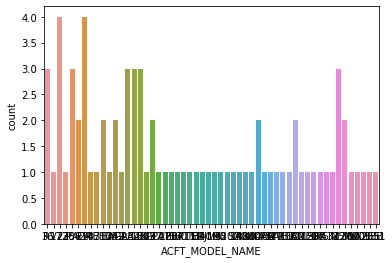

In [27]:
# Find the aircraft types and their occurrences in the dataset
sns.countplot(x='ACFT_MODEL_NAME',data=df)

In [33]:
#Remove all the observations where aircraft names are not available
df.dropna(subset=['ACFT_MODEL_NAME'],axis=0,inplace=True)
df

,UPDATED,ENTRY_DATE,EVENT_LCL_DATE,EVENT_LCL_TIME,LOC_CITY_NAME,LOC_STATE_NAME,LOC_CNTRY_NAME,RMK_TEXT,EVENT_TYPE_DESC,FSDO_DESC,...,PAX_INJ_NONE,PAX_INJ_MINOR,PAX_INJ_SERIOUS,PAX_INJ_FATAL,PAX_INJ_UNK,GRND_INJ_NONE,GRND_INJ_MINOR,GRND_INJ_SERIOUS,GRND_INJ_FATAL,GRND_INJ_UNK
0,No,2016-02-19,2016-02-19,00:45:00Z,MARSHVILLE,North Carolina,NaN,"AIRCRAFT CRASHED INTO TREES, THE 1 PERSON ON B...",Accident,FAA Charlotte FSDO-68,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,No,2016-02-19,2016-02-18,23:55:00Z,TAVERNIER,Florida,NaN,AIRCRAFT ON LANDING WENT OFF THE END OF THE RU...,Incident,FAA Miami FSDO-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,No,2016-02-19,2016-02-18,22:14:00Z,TRENTON,New Jersey,NaN,"AIRCRAFT ON FINAL SUSTAINED A BIRD STRIKE, LAN...",Incident,FAA Philadelphia FSDO-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,No,2016-02-19,2016-02-18,17:10:00Z,ASHEVILLE,North Carolina,NaN,"AIRCRAFT ON LANDING, GEAR COLLAPSED, ASHEVILLE...",Incident,FAA Charlotte FSDO-68,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,No,2016-02-19,2016-02-18,00:26:00Z,TALKEETNA,Alaska,NaN,"AIRCRAFT ON LANDING, NOSE GEAR COLLAPSED, TALK...",Incident,FAA Anchorage FSDO-03,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,No,2016-02-08,2015-12-31,17:00:00Z,SAN ANTONIO,Texas,NaN,"AIRCRAFT ON LANDING, GROUND LOOPED, BULVERDE A...",Accident,FAA San Antonio FSDO-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79,No,2016-02-08,2016-02-05,11:17:00Z,MARICOPA,Arizona,NaN,"AIRCRAFT CRASHED UNDER UNKNOWN CIRCUMSTANCES, ...",Accident,FAA Scottsdale FSDO-07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80,No,2016-02-08,2016-02-05,23:02:00Z,SAN PEDRO,California,NaN,"N9872R, BEECH M35 AIRCRAFT, AND N5057G, BELLAN...",Accident,FAA Long Beach FSDO-05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,No,2016-02-08,2016-02-05,23:02:00Z,SAN PEDRO,California,NaN,"N9872R, BEECH M35 AIRCRAFT, AND N5057G, BELLAN...",Accident,FAA Long Beach FSDO-05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
# Display the observations where fatal flag is “Yes”
df.loc[df['FATAL_FLAG']=='Yes']


,UPDATED,ENTRY_DATE,EVENT_LCL_DATE,EVENT_LCL_TIME,LOC_CITY_NAME,LOC_STATE_NAME,LOC_CNTRY_NAME,RMK_TEXT,EVENT_TYPE_DESC,FSDO_DESC,...,PAX_INJ_NONE,PAX_INJ_MINOR,PAX_INJ_SERIOUS,PAX_INJ_FATAL,PAX_INJ_UNK,GRND_INJ_NONE,GRND_INJ_MINOR,GRND_INJ_SERIOUS,GRND_INJ_FATAL,GRND_INJ_UNK
0,No,2016-02-19,2016-02-19,00:45:00Z,MARSHVILLE,North Carolina,NaN,"AIRCRAFT CRASHED INTO TREES, THE 1 PERSON ON B...",Accident,FAA Charlotte FSDO-68,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,No,2016-02-19,2016-02-18,23:55:00Z,TAVERNIER,Florida,NaN,AIRCRAFT ON LANDING WENT OFF THE END OF THE RU...,Incident,FAA Miami FSDO-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,No,2016-02-19,2016-02-18,22:14:00Z,TRENTON,New Jersey,NaN,"AIRCRAFT ON FINAL SUSTAINED A BIRD STRIKE, LAN...",Incident,FAA Philadelphia FSDO-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,No,2016-02-19,2016-02-18,17:10:00Z,ASHEVILLE,North Carolina,NaN,"AIRCRAFT ON LANDING, GEAR COLLAPSED, ASHEVILLE...",Incident,FAA Charlotte FSDO-68,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,No,2016-02-19,2016-02-18,00:26:00Z,TALKEETNA,Alaska,NaN,"AIRCRAFT ON LANDING, NOSE GEAR COLLAPSED, TALK...",Incident,FAA Anchorage FSDO-03,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,No,2016-02-08,2015-12-31,17:00:00Z,SAN ANTONIO,Texas,NaN,"AIRCRAFT ON LANDING, GROUND LOOPED, BULVERDE A...",Accident,FAA San Antonio FSDO-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79,No,2016-02-08,2016-02-05,11:17:00Z,MARICOPA,Arizona,NaN,"AIRCRAFT CRASHED UNDER UNKNOWN CIRCUMSTANCES, ...",Accident,FAA Scottsdale FSDO-07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80,No,2016-02-08,2016-02-05,23:02:00Z,SAN PEDRO,California,NaN,"N9872R, BEECH M35 AIRCRAFT, AND N5057G, BELLAN...",Accident,FAA Long Beach FSDO-05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,No,2016-02-08,2016-02-05,23:02:00Z,SAN PEDRO,California,NaN,"N9872R, BEECH M35 AIRCRAFT, AND N5057G, BELLAN...",Accident,FAA Long Beach FSDO-05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
